### Machine Learning (I)
### Lect 2: KNN, NB, LR

Yiqing LIN (林一青)

**@ SAIF, SJTU**

*Shanghai · China*

*Nov. 16, 2020*

**About Sklearn**

Scikit-learn is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

https://scikit-learn.org/stable/index.html

In [36]:
from sklearn import datasets

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns

**Sklearn datasets**

scikit-learn comes with a few small standard datasets that do not require to download any file from some external website.

They can be loaded using the following functions:

load_boston(*[, return_X_y])

*Load and return the boston house-prices dataset (regression).*

load_iris(*[, return_X_y, as_frame])

*Load and return the iris dataset (classification).*

load_diabetes(*[, return_X_y, as_frame])

*Load and return the diabetes dataset (regression).*

load_digits(*[, n_class, return_X_y, as_frame])

*Load and return the digits dataset (classification).*

load_linnerud(*[, return_X_y, as_frame])

*Load and return the physical excercise linnerud dataset.*

load_wine(*[, return_X_y, as_frame])

*Load and return the wine dataset (classification).*

load_breast_cancer(*[, return_X_y, as_frame])

*Load and return the breast cancer wisconsin dataset (classification).*

These datasets are useful to quickly illustrate the behavior of the various algorithms implemented in scikit-learn. They are however often too small to be representative of real world machine learning tasks.

In [41]:
datasets.load_iris?

**About Iris data**

First academic papers that dealt with what we call classification
Author: Sir Ronald Fisher, a mid-20th-century statistician
Data collected by Edgar Anderson

Iris -- a flower

Features : Sepal length/width; Petal length/width
Targets: Species (setosa, veriscolor, virginica)

![iris](iris.jpeg)  

In [43]:
iris = datasets.load_iris() #Load the iris dataset -- A Dictionary
iris.keys()
#len(iris)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [44]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [45]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [46]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
iris.data[0]
#iris.data[1]

array([5.1, 3.5, 1.4, 0.2])

In [47]:
len(iris.data)

150

In [48]:
len(iris.data[0])

4

In [11]:
iris.data.shape

(150, 4)

In [12]:
iris.data[0][1]

3.5

In [49]:
type(iris.data[0][1])

numpy.float64

In [56]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names) #Create a DataFrame
#iris_df
iris_df['target'] = iris.target #add the column named 'target'
#iris_df['test'] = np.arange(150)
#iris_df['test'] = np.arange(148)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [57]:
#pd.options.display.max_rows = 20
iris_df
#iris_df.head(20)
#iris_df.tail(3)
display(pd.concat([iris_df.head(3), iris_df.tail(3)]))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


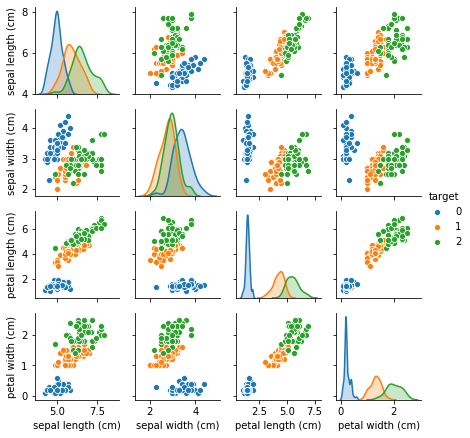

In [21]:
#sns.pairplot gives a nice panel of graphics. 
#The diagonal entries: histograms of the frequency of the different types of iris
#The off-diagonal entries: scatter plots of pairs of features (pairs occurs twice)
#The parameter 'hue': different types (target values) are differentiated by color
sns.pairplot(iris_df, hue='target=', height=1.5)

In [34]:
# 小括号 Parentheses; 中括号：bracket; 大括号：braces
print('targets: {}'.format(iris.target_names), iris.target_names[0], sep='\n')
#print('targets: {}'.format(iris.target_names), iris.target_names[0], sep='$')
#print('targets: {}'.format(iris.data[1]), iris.target_names[0], sep='.')

targets: ['setosa' 'versicolor' 'virginica']
setosa
